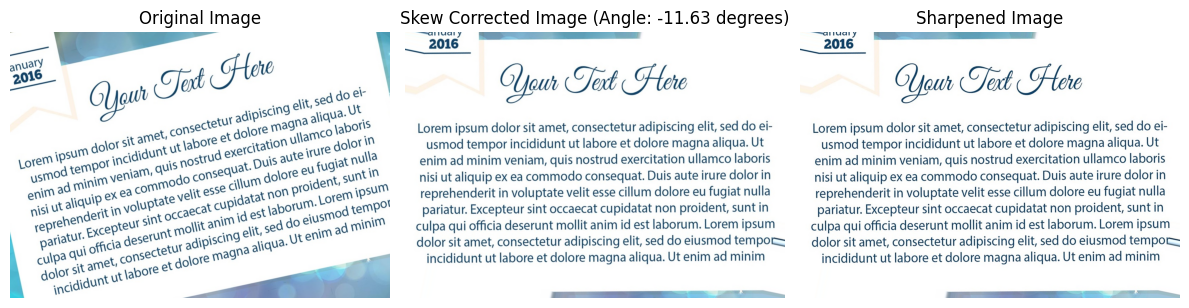

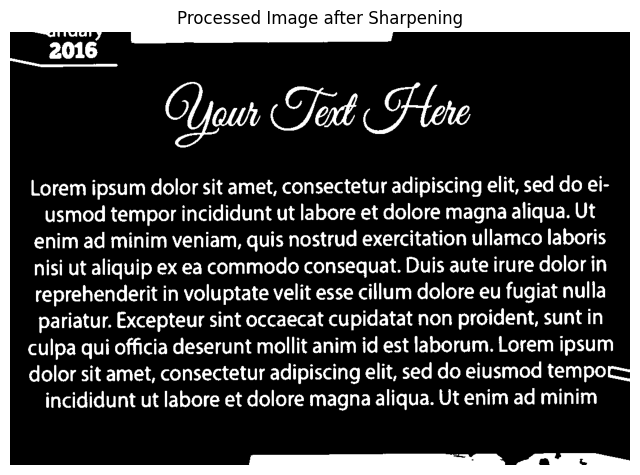

Extracted Text:
heehee?

2016

Yun Toit Hore

Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do ei-
usmod tempor incididunt ut labore et dolore magna aliqua. Ut
enim ad minim veniam, quis nostrud exercitation ullamco laboris
nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in
reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla
pariatur. Excepteur sint occaecat cupidatat non proident, sunt in
culpa qui officia deserunt mollit anim id est laborum. Lorem ipsum
dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor
incididunt ut labore et dolore magna aliqua. Ut enim ad minim

OCR Accuracy: 94.23%
Character Error Rate (CER): 0.0577
Levenshtein Distance: 37


In [9]:
import cv2
import numpy as np
from PIL import Image
import pytesseract
import matplotlib.pyplot as plt
import Levenshtein

pytesseract.pytesseract.tesseract_cmd = r'C:\Users\Tesseract\tesseract.exe'

# Function to sharpen the image using Unsharp Masking
def sharpen_image(image):
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    sharpened = cv2.addWeighted(image, 1.5, blurred, -0.5, 0)
    return sharpened
 
# Function to correct skewness
def correct_skew(image):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply adaptive thresholding to get binary image
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    
    # Detect lines in the image using Hough transform
    lines = cv2.HoughLinesP(binary, 1, np.pi / 180, 100, minLineLength=100, maxLineGap=10)
    
    # Calculate angle of lines
    angles = []
    for line in lines:
        x1, y1, x2, y2 = line[0]
        angle = np.degrees(np.arctan2(y2 - y1, x2 - x1))
        angles.append(angle)
    
    # Calculate the median angle (most prominent direction of lines)
    median_angle = np.median(angles)
    
    # Rotate the image to correct skew
    rotated = rotate_image(image, median_angle)
    
    return rotated, median_angle
 
def rotate_image(image, angle):
    # Get image dimensions
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    
    # Perform rotation
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    
    return rotated
 

image_path = 'text_img - Copy.jpg'
image = cv2.imread(image_path)
 
# Correct skewness
skew_corrected_image, skew_angle = correct_skew(image)
 
# Sharpen the image to reduce blurriness
sharpened_image = sharpen_image(skew_corrected_image)
 
# Display the original, skew corrected, and sharpened images
plt.figure(figsize=(12, 6))
 
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
 
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(skew_corrected_image, cv2.COLOR_BGR2RGB))
plt.title(f'Skew Corrected Image (Angle: {skew_angle:.2f} degrees)')
plt.axis('off')
 
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2RGB))
plt.title('Sharpened Image')
plt.axis('off')
 
plt.tight_layout()
plt.show()
 
# Convert sharpened image to grayscale
gray_sharpened = cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2GRAY)
 
# Apply Gaussian blur to reduce noise
blurred_corrected = cv2.GaussianBlur(gray_sharpened, (5, 5), 0)
 
# Perform adaptive thresholding to create binary image
_, binary_corrected = cv2.threshold(blurred_corrected, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
 
# Invert binary image (if needed)
binary_corrected = cv2.bitwise_not(binary_corrected)
 
# Display the processed image
plt.figure(figsize=(8, 6))
plt.imshow(binary_corrected, cmap='gray')
plt.title('Processed Image after Sharpening')
plt.axis('off')
plt.show()
 
# Perform OCR using pytesseract on the sharpened image
extracted_text = pytesseract.image_to_string(Image.fromarray(binary_corrected))
 
# Display the extracted text
print("Extracted Text:")
print(extracted_text)


# Function to compare OCR output against ground truth text
def calculate_accuracy(ocr_text, ground_truth_text):
    # Remove any leading/trailing whitespaces and convert to lowercase 
    ocr_text = ocr_text.strip().lower()
    ground_truth_text = ground_truth_text.strip().lower()
    
    # Calculate Levenshtein distance
    distance = Levenshtein.distance(ocr_text, ground_truth_text)
    
    # Calculate accuracy metrics
    len_gt = len(ground_truth_text)
    cer = distance / len_gt  # Character Error Rate (CER)
    accuracy = 1 - cer       # Accuracy
    
    return accuracy, cer, distance
 
ground_truth = '''january 2016

your text here

Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do ei-
usmod tempor incididunt ut labore et dolore magna aliqua. Ut
enim ad minim veniam, quis nostrud exercitation ullamco laboris

nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in
reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla
pariatur. Excepteur sint occaecat cupidatat non proident, sunt in
culpa qui officia deserunt mollit anim id est laborum. Lorem ipsum
dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor
incididunt ut labore et dolore magna aliqua. Ut enim ad minim

Designed by Vecteezy'''

ocr_output = extracted_text
 
accuracy, cer, distance = calculate_accuracy(ocr_output, ground_truth)
 
print(f"OCR Accuracy: {accuracy * 100:.2f}%")
print(f"Character Error Rate (CER): {cer:.4f}")
print(f"Levenshtein Distance: {distance}")